- 인공뉴런(퍼셉트론) : 입력값과 가중치, 편향을 이용해 출력을 내는 수학적 모델
- 활성화 함수 : 뉴런의 출력을 다음 뉴런으로 넘길지 결정하는 함수
- 손실 함수 : 정답과 신경마이의 예측의 차이를 나타내는 함수

학습순서 :
  - 퍼셉트론
  - 다층 신경망
  - 인공신경망의 학습 방법
  - 손실 함수
  - 경사하강법과 오차 역전파
  - 신경망 성능 비교
  - 기울기 소실 예방

# 퍼셉트론


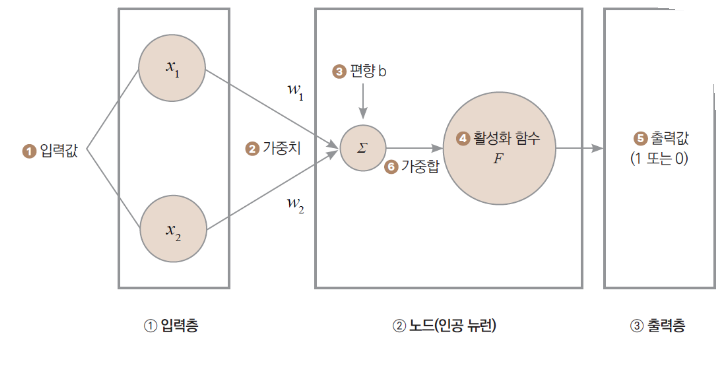

In [ ]:
# F(x1w1 + x2w2 + b)

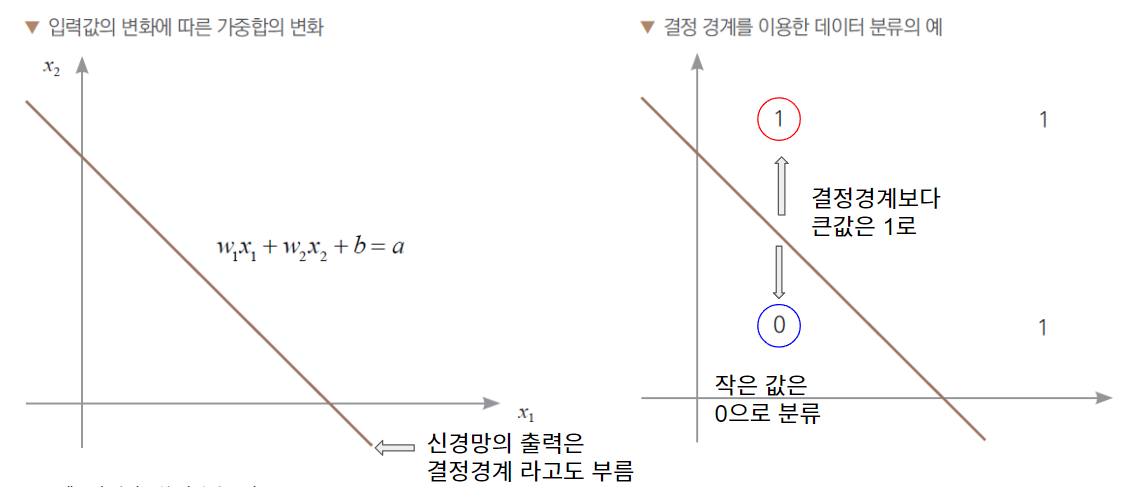

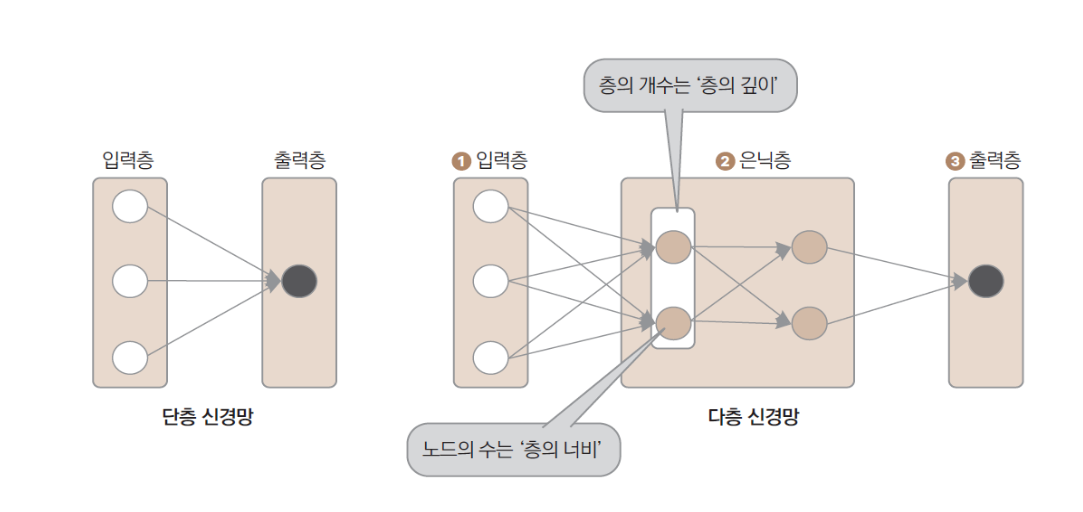

손실함수를 이용해서 가중치를 찾기

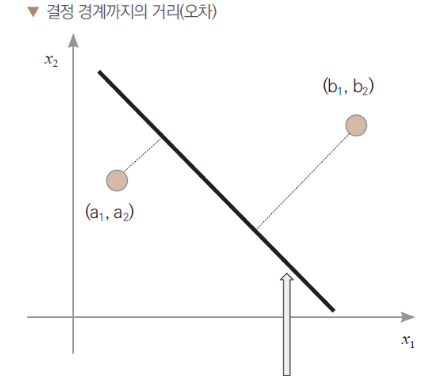

In [1]:
# y = F(w5a1 + w6a2 + b3)

다층 퍼셉트론

In [2]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [69]:
import pandas as pd
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
dataFrame = pd.DataFrame(data,columns=['CRIM','ZN'   ,'INDUS','CHAS' ,'NOX'  ,'RM'   ,'AGE'  ,'DIS'  ,'RAD' ,'TAX' ,'PTRATIO','B'      ,'LSTAT'   ])
dataFrame['target'] = target
dataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [71]:
dataFrame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [127]:
model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
)
x = dataFrame.drop('target', axis=1)
y = dataFrame['target']
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# 넘파이를 pytorch 텐서로 변환
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1,1)
x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1,1)

In [128]:
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [129]:
len(x_train_tensor)

404

In [130]:
batch_size = 50
for epoch in range(2000):
  for i in range(len(x_train_tensor)//batch_size):
    model.train()
    start = i * batch_size
    end = start + batch_size

    x = x_train_tensor[start:end]
    y = y_train_tensor[start:end]
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if(epoch+1) % 10 == 0:
      print(f'Epoch {epoch+1} Loss: {loss.item()}')

Epoch 10 Loss: 513.3571166992188
Epoch 10 Loss: 563.6476440429688
Epoch 10 Loss: 706.428466796875
Epoch 10 Loss: 549.9295043945312
Epoch 10 Loss: 595.0291748046875
Epoch 10 Loss: 662.1631469726562
Epoch 10 Loss: 576.1316528320312
Epoch 10 Loss: 575.4176025390625
Epoch 20 Loss: 479.3788757324219
Epoch 20 Loss: 531.639404296875
Epoch 20 Loss: 666.5826416015625
Epoch 20 Loss: 511.7891845703125
Epoch 20 Loss: 558.708984375
Epoch 20 Loss: 621.9485473632812
Epoch 20 Loss: 541.723876953125
Epoch 20 Loss: 539.9232177734375
Epoch 30 Loss: 428.5880432128906
Epoch 30 Loss: 483.4971618652344
Epoch 30 Loss: 606.670166015625
Epoch 30 Loss: 454.8515625
Epoch 30 Loss: 504.22406005859375
Epoch 30 Loss: 561.3059692382812
Epoch 30 Loss: 490.373046875
Epoch 30 Loss: 486.53558349609375
Epoch 40 Loss: 360.0625915527344
Epoch 40 Loss: 418.5698547363281
Epoch 40 Loss: 523.70849609375
Epoch 40 Loss: 378.47625732421875
Epoch 40 Loss: 430.2290954589844
Epoch 40 Loss: 477.82672119140625
Epoch 40 Loss: 420.3287048

In [132]:
# 모델 평가
from sklearn.metrics import r2_score
model.eval()
with torch.no_grad():
  y_pred = model(x_test_tensor)
  loss = criterion(y_pred, y_test_tensor)
  r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())
  print(f'Test Loss: {loss.item()}  r2 {r2}')

Test Loss: 11.314932823181152  r2 0.845706410721478
